<a href="https://colab.research.google.com/github/DanielSalvadorP/ChatsSockets/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

número de registros 1338
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
El número total de datos después de eliminar las filas con valores falt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


'\n\n'

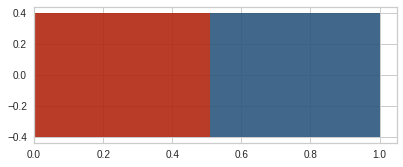

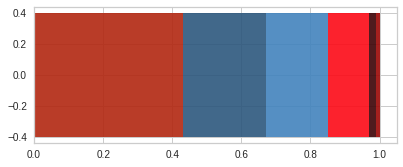

In [25]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings

#Carga de datos
data=pd.read_csv('insurance.csv')#,sep="\t"

#Numero de registros
print("número de registros",len(data))

#Miramos las columnas y datos que tienen
print(data.head())

#Miramos la información del tipo de datos que tienen las columnas
data.info()

#Eliminamos valores nulos
data= data.dropna()
print("El número total de datos después de eliminar las filas con valores faltantes es:", len(data))

#Revisamos cuantos valores nulos hay
print(data.isnull().sum())
print("Encontramos que dentro de la base de datos, no tenemos valores nulos los cuales reemplazar o eliminar.")

#Reformateamos los datos de los valores decimales de punto decimal a coma decimal en el estandar latino.
columna_charges= data['charges'].astype(str).str.replace('.', ',')
print(columna_charges)
columna_bmi= data['bmi'].astype(str).str.replace('.', ',')
print(columna_bmi)

#Porcentaje de sexos
b=data.value_counts(data['sex'])
b
y=len(data)
r=((b/y)).round(2)
print(r)

#Graficando porcentaje de sexos
sex_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))
 
ax.barh(sex_ratio.index, sex_ratio['male'], 
        color='#b22710', alpha=0.9, label='male')
ax.barh(sex_ratio.index, sex_ratio['female'], left=sex_ratio['male'], 
        color='#2C577D', alpha=0.9, label='male')

#Explicación grafica de sexos
print(f"""Podemos encontrar con el grafico y porcentaje de sexos, que en su mayoría, 
las personas registrada en la base de datos son varones con una superioridad en registros del 1%.
Teniendo así, un porcentaje de varones del {float(sex_ratio['male'])}% y de mujeres del {float(sex_ratio['female'])}%.""")

#Porcentaje de hijos que tienen las personas
d=data.value_counts(data['children'])
d
f=len(data)
t=((d/f)).round(2)
print(t)
#Graficando porcentaje de sexos
children_ratio = pd.DataFrame(t).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))
 
ax.barh(children_ratio.index, children_ratio[int('0')], 
        color='#b22710', alpha=0.9, label='0')
ax.barh(children_ratio.index, children_ratio[int('1')], left=children_ratio[int('0')], 
        color='#2C577D', alpha=0.9, label='1')
ax.barh(children_ratio.index, children_ratio[int('2')], left=children_ratio[int('0')]+children_ratio[int('1')], 
        color='#4283BD', alpha=0.9, label='2')
ax.barh(children_ratio.index, children_ratio[int('3')], left=children_ratio[int('0')]+children_ratio[int('1')]+children_ratio[int('2')], 
        color='#FC0A16', alpha=0.9, label='3')
ax.barh(children_ratio.index, children_ratio[int('4')], left=children_ratio[int('0')]+children_ratio[int('1')]+children_ratio[int('2')]+children_ratio[int('3')], 
        color='#3D0205', alpha=0.9, label='4')
ax.barh(children_ratio.index, children_ratio[int('5')], left=children_ratio[int('0')]+children_ratio[int('1')]+children_ratio[int('2')]+children_ratio[int('3')]+children_ratio[int('4')], 
        color='#9D0705', alpha=0.9, label='5')
#Explicaicón grafica de hijos
print("""Con los datos de los hijos, encontramos que la mayoría de las personas registradas en la base de datos,
tienen 1 o más hijos, teniendo en cuenta como datos individuales, son más las personas que están en el grupo
de los que no tienen hijos a los que tienen 1, como a su vez, son más los que tienen 1 que los que tienen 2,
3 o 4, siendo 5 la cantidad que menos personas tienen en decendencia.""")
"""

"""